# MACHINE LEARNING WITH SCIKIT-LEARN

# Partie V : optimisation de paramètres par la fonction **GridSearch**

Dans cet exercice nous allons apprendre à manipuler la classe **GridSearch** qui permet d'optimiser de manière systématique les paramètres d'un modèle de prédiction par validation croisée.

Nous travaillerons toujours à partir de l'algorithme des $k$-ppv et de la classe **KNeighborsClassifier** et nous utiliserons le jeu de données **digits** que l'on peut [charger à partir de scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) et dont on trouve un descriptif sur le [site de l'UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Cet exercice nous permettra également d'illustrer l'impact de la taille du jeu de données d'apprentissage sur la qualité du modèle obtenu par une analyse de **learning curve**.

## Question 1. Charger le jeu de données en utilisant la fonction *load_digits*  du module *datasets*. En extraire le nombre d'observations et de descripteurs disponibles et représenter sous la forme d'un diagramme en bâton (barplot) les effectifs par classe. 

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# get data #
#----------#
from sklearn.datasets import load_digits
digits = load_digits()
# extract X and y
X = digits.data
y = digits.target
# show info
class_ids = digits.target_names
n = X.shape[0]
p = X.shape[1]
K = len(class_ids)
print('load dataset of size %d x %d involving %d classes' % (n,p,K))

load dataset of size 1797 x 64 involving 10 classes


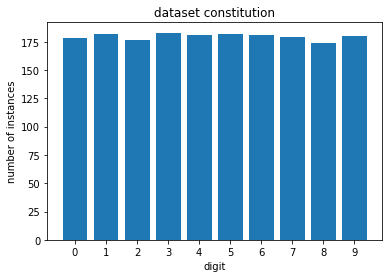

In [7]:
# show dataset constitution #
#---------------------------#
counts = np.bincount(y)
plt.bar(range(K), counts)
plt.ylabel('number of instances')
plt.title('dataset constitution')
plt.xlabel("digit")
plt.xticks(range(K), class_ids)
plt.show()

## Question 2. Afficher quelques images avec le code ci-dessous.

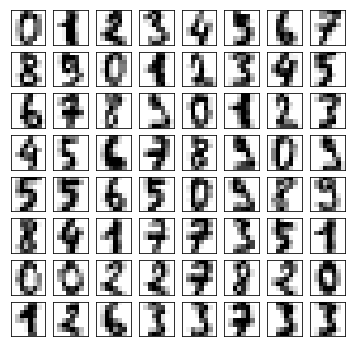

In [9]:
# show a few images #
#-------------------#
fig, ax = plt.subplots(8, 8, figsize = (6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[],yticks=[])
plt.show()

## Question 3. Découper le jeu de données en ensembles d'apprentissage et de test en utilisant la fonction [*train_test_split*](http://scikit-learn.org/stable/modules/cross_validation.html) du module *model_selection*. Conserver 1/3 du jeu de données pour le test et réaliser ce découpage de manière stratifiée, i.e., en faisant en sorte d'avoir les mêmes proportions des différentes catégories en apprentissage et en test. Vérifier que c'est bien le cas.

* se référer à la documentatipon de la fonction **train_test_split** pour voir comment contrôler la stratification
* on pourra par exemple s'appuyer sur la fonction **bincount** du package NumPy pour calculer les proportions des différentes classes.
* on pourra également bloquer le générateur de nombre aléatoire lors de l'appel à la fonction **train_test_split** pour que le script soit reproductible.

In [8]:
# split in train/test #
#---------------------#
X = digits.data
y = digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 27)

# check proportions #
#-------------------#
prop_train = np.bincount(y_train)/len(y_train)
prop_test = np.bincount(y_test)/len(y_test)
print(prop_train)
print(prop_test)


[ 0.09891937  0.10141313  0.09808811  0.10224439  0.10058188  0.10141313
  0.10058188  0.09975062  0.0964256   0.10058188]
[ 0.0993266  0.1010101  0.0993266  0.1010101  0.1010101  0.1010101
  0.1010101  0.0993266  0.0976431  0.0993266]


## Question 4. Utiliser la classe [*GridSearchCV*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pour optimiser le nombre de voisins à considérer pour l'algorithme des $k$-ppv.  On considèrera une procédure de validation croisée à 10 folds. Quelle est la valeur de $k \in \{1,3,5,...,13,15\}$ retenue ? Pour quelle performance ? 

Pour cela il faut (**voir l'exemple donné dans le cours**) : 
1. importer la fonction *KNeighborsClassifier* du module *neighbors* et instancier un modèle
2. définir la grille de paramètre à utiliser, en l'occurence basée sur le paramètre **n_neighbors** 
3. importer la classe *GridSearchCV* du module *model_selection* et instancier un model 
5. 'fitter' l'objet *GridSearchCV* (via sa méthode *fit*) à partir du modèle $k$-ppv et de la grille de paramètres.

On peut ensuite savoir quelle est la configuration retenue et le score de validation croisée associée en s'intéressant aux attributs **best\_params\_** et **best\_score\_** de l'objet *GridSearchCV*.

In [13]:
# optimize parameters by grid_search #
#------------------------------------#
# define model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# define grid of parameters
k_list = np.arange(1,16,2)
param_grid = {'n_neighbors' : k_list}
# define grid search model
from sklearn.model_selection import GridSearchCV
n_folds = 10
grid_search = GridSearchCV(knn, param_grid, cv = n_folds)
# fit
grid_search.fit(X_train, y_train)
# pring results
print("The best parameters are %s with a score of %0.2f"
      % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'n_neighbors': 3} with a score of 0.99


## Question 5. Pour mieux apprécier l'impact du nombre de voisins, tracer l'évolution des performances de validation croisée quand $k$ varie. Peut-on être confiant quant à la valeur retenue ?

* Notons que le champ **cv_results** de l'objet *GridSearchCV* contient toutes les informations nécessaires. 
* On ne considèrera que  la performance moyenne par fold.

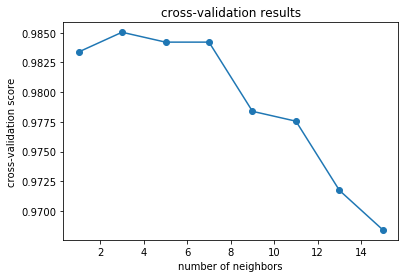

In [15]:
# show CV results vs model parameters #
#-------------------------------------#
plt.plot(grid_search.cv_results_['param_n_neighbors'].data, grid_search.cv_results_['mean_test_score'], '-o')
plt.xlabel('number of neighbors')
plt.ylabel('cross-validation score')
plt.title('cross-validation results')
plt.show()

## Question 6. Calculer les prédictions sur le jeu de test et calculer la matrice de confusion associée. La représenter sous la forme d'une image en utilisant la fonction [*heatmap*](https://seaborn.pydata.org/generated/seaborn.heatmap.html) du module *seaborn*

* NB : à l'issue de la procédure d'optimisation, l'objet *GridSearchCV* reconstuit (sur l'ensemble du jeu d'apprentissage) le meilleur modèle et le stocke dans son champ **best\_estimator\_**. Il n'est donc pas nécessaire de le reconstruire manuellement.
* Pour afficher la matrice de confusion, il suffit de la passer comme argument à la fonction *heatmap* (avec l'option **annot = True** pour y faire figurer les valeurs numériques).

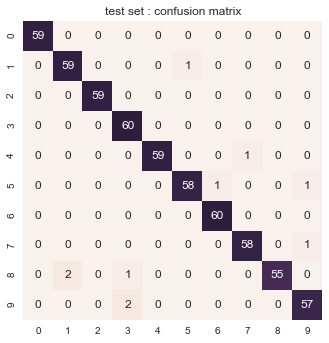

In [18]:
# get prediction on test set #
#----------------------------#
preds = grid_search.best_estimator_.predict(X_test)
# or directly : 
#preds = grid_search.predict(X_test)

from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, $)
import seaborn as sns
sns.heatmap(cmat, square = True, annot = True, cbar = False)
plt.title('test set : confusion matrix')
plt.show()

## Question 7. Effectuer une analyse par "learning curve" pour vérifier que le jeu de données était d'une taille suffisante.

* on utilisera pour cela la fonction [**learning_curve**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) du module *model_selection*.
* là aussi, on peut lui passer directement le meilleur modèle retenu à l'issue de l'optimisation des paramètres (et stocké dans le champ **best\_estimator\_** de l'objet *GridSearchCV*).
* il faut définir le paramètre **train_sizes** définissant les tailles de jeu de données à considérer. Ces tailles sont définies comme des proportions du jeu de données total : on pourra par exemple les prendre entre 10% et 100%.


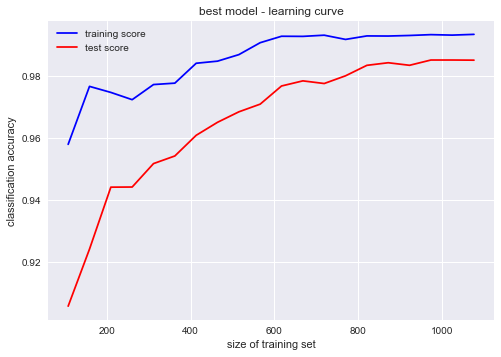

In [21]:
# learning curve analysis #
#-------------------------#
# fit learning curve
from sklearn.model_selection import learning_curve
size_grid = np.linspace(0.1, 1, 20)
N, train_lc, val_lc = learning_curve(grid_search.best_estimator_, X_train, y_train, train_sizes = size_grid, cv = 10)
# plot
plt.plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
plt.plot(N, np.mean(val_lc, 1), color = 'red', label = 'test score')
plt.legend()
plt.xlabel('size of training set')
plt.ylabel('classification accuracy')
plt.title('best model - learning curve')
plt.show()

## Pour aller plus loin : Question 8. Visualiser les erreurs de classification obtenues.

* s'inspirer du code utilisé au début de l'exercice du TP pour représenter les images.
* attention cependant au découpage train/test qui ne permet plus de partir du champ *digits* du jeu de données.

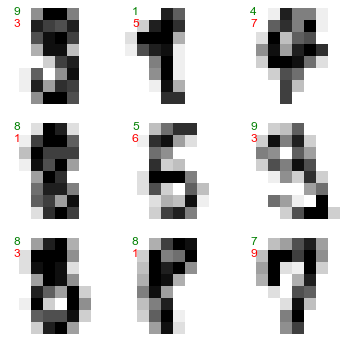

In [19]:
ind_err = np.where(preds != y_test)

fig, ax = plt.subplots(3, 3, figsize = (6,6))
for i, axi in enumerate(ax.flat):
    im = np.reshape(X_test[ind_err[0][i],:], (8,8))
    axi.imshow(im, cmap='binary')
    axi.set(xticks=[],yticks=[])
    #axi.title('ref = %d, pred = %d' % (y_test[i],preds[i]))
    axi.text(0.05, 0.05, str(y_test[ind_err[0][i]]), color = 'green')
    axi.text(0.05, 1, str(preds[ind_err[0][i]]), color = 'red')
   
plt.show()